# 3) Utilize os recursos do Pandas, dentre outros recursos disponíveis, para executar as etapas a seguir a partir do dataset, por você selecionado:

## a) Liste os campos que compõem cada registro

In [19]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv('/home/jrosa/Documentos/UFS/PLN/PLN_2024_Datasets_Desbalanceados_Conceicao_Joao/Dataset/dataset_desbalanceado.csv')

# Convertendo os valores 1 e 0 para "spam" e "ham" na coluna 'label'
df['label'] = df['label'].replace({1: 'spam', 0: 'ham'})

# Listando os campos (colunas) do dataset
campos = df.columns
print(campos)


Index(['label', 'text'], dtype='object')


## b) Liste os labels das classes existentes

In [20]:
# Listando os labels únicos presentes no campo 'label'
labels_unicos = df['label'].unique()
print(labels_unicos)


['ham' 'spam']


## c) Liste a quantidade de registros que não contenham label, que contenham um label, dois labels, até o máximo de labels existentes. 

In [21]:
# Contando a quantidade de labels por registro
df['label_count'] = df['label'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

# Agrupando os registros pela quantidade de labels
quantidade_por_labels = df['label_count'].value_counts()
print(quantidade_por_labels)


label_count
1    10997
Name: count, dtype: int64


# d) Liste a quantidade de registros associados a cada label/classe existente

In [22]:
# Caso os labels estejam separados por vírgula (multi-label)
from collections import Counter

label_list = df['label'].dropna().apply(lambda x: x.split(',')).tolist()
flattened_labels = [item for sublist in label_list for item in sublist]

# Contando a quantidade de registros por label
label_counts = Counter(flattened_labels)
print(label_counts)

Counter({'ham': 7998, 'spam': 2999})


# e) Liste a quantidade de registros com labels/classes e sem labels/classes

In [23]:
# Contando registros com labels e sem labels
sem_label = df['label'].isna().sum()
com_label = len(df) - sem_label
print(f"Registros sem label: {sem_label}, Registros com label: {com_label}")

Registros sem label: 0, Registros com label: 10997


# 4) Identifique quais labels/classes serão utilizados na atividade de classificação a ser realizada. Aplique um filtro apropriado para uso destes registros na atividade.

### Resposta: Todos as classes e labels do arquivo serão utilizados

# 5) Crie uma nova coluna no dataframe do Pandas que você está utilizando para indicar se o registro possui label ou não.

### Resposta: nenhum registro do meu dataframe possui label em branco

# 6) Caso dois ou mais campos contenham informação textual de interesse para a análise, avalie a possibilidade de concatená-los em um único campo. 

### Resposta: o meu dataset escolhido só possui uma label de texto


# 7) Identifique possíveis registros duplicados e remova-os.

In [24]:
# Identificando registros duplicados (assumindo que a coluna 'text' é onde você quer identificar duplicatas)
duplicatas = df[df.duplicated(subset=['text'], keep=False)]

# Contando o número de duplicatas
numero_duplicatas = duplicatas.shape[0]
print(f"Número de duplicatas encontradas: {numero_duplicatas}")

# Removendo as duplicatas e mantendo apenas o primeiro de cada duplicata
df_sem_duplicatas = df.drop_duplicates(subset=['text'], keep='first')

# Conferindo a quantidade de registros após a remoção das duplicatas
numero_registros_removidos = df.shape[0] - df_sem_duplicatas.shape[0]
print(f"Número de duplicatas removidas: {numero_registros_removidos}")


Número de duplicatas encontradas: 0
Número de duplicatas removidas: 0


# 8) Apresente um gráfico para mostrar a distribuição de quantidade de palavras por registro.

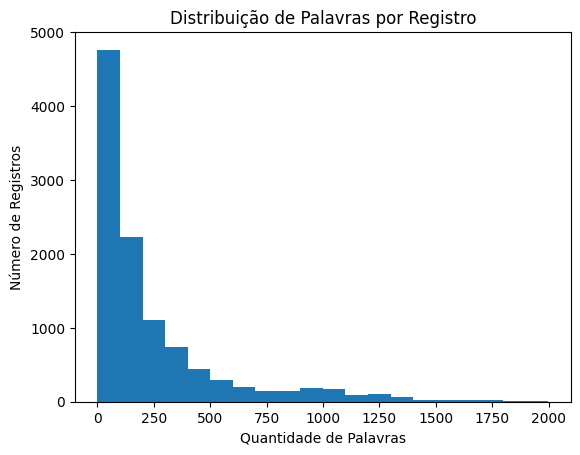

In [25]:
import matplotlib.pyplot as plt

# Contando a quantidade de palavras por registro
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df_filtered = df[df['word_count'] < 2000]
# Plotando o gráfico
plt.hist(df_filtered['word_count'], bins=20)
plt.xlabel('Quantidade de Palavras')
plt.ylabel('Número de Registros')
plt.title('Distribuição de Palavras por Registro')
plt.show()

# 9) Utilize a biblioteca Scikit-multilearn para criar os conjuntos de registros para treinamento, validação e teste.


In [26]:
from sklearn.model_selection import train_test_split

# Supondo que 'text' seja a coluna com os textos e 'label' contenha os rótulos (convertidos para "sim" e "não")
X = df['text']  # Features (textos)
y = df['label']  # Labels (rótulos)

# Dividindo o dataset em treino (70%), validação (15%) e teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificando os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")


Tamanho do conjunto de treinamento: 7697
Tamanho do conjunto de validação: 1650
Tamanho do conjunto de teste: 1650


# 10) Crie os training slices do seu dataset. 

In [27]:
# Supondo que 'X_train' e 'y_train' já foram definidos no passo anterior
num_slices = 3  # Quantidade de slices que você deseja criar
slice_size = 0.5  # Porcentagem de dados que cada slice vai conter do conjunto de treino

# Criando os slices e armazenando-os em listas
X_train_slices = []
y_train_slices = []

for i in range(num_slices):
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, test_size=(1 - slice_size), random_state=i)
    X_train_slices.append(X_slice)
    y_train_slices.append(y_slice)

    # Printando exemplos de cada slice
    print(f"Slice {i+1} - Exemplos:")
    print("Textos:", X_slice.head(3).tolist())  # Exemplo com 3 textos de cada slice
    print("Labels:", y_slice.head(3).tolist())  # Exemplo com 3 labels de cada slice
    print("-" * 50)


Slice 1 - Exemplos:
Textos: ["take charge of your medical conditions now order online live a healthier and happier life all from the comfort of your home depresion an xiety paain relief mus cle relaxants women's health anti hiv allergies sexual health and wt loss try something new your great escapenumber prescriptions available get some new deals http toseit com newmeds index php remescapenumberve on site or write to pairideza consultants po box escapenumber maenam post office surathani ko samui escapenumber thailand", 'russ is unable to reach you we have problems in sitara please call escapenumber', "no robert did not leave me any cd's did you tell him to subject re hello date mon escapenumber jul escapenumber escapenumber escapenumber escapenumber escapenumber from davis dana to i'm at work yes that cayenne pepper is hot just don't use that then did uncle robert leave any of those cd's with you original message from mfoster grti tec ar us mailto mfoster grti tec ar us sent wednesday 

# 11) Implemente o Naive Bayesline e apresente os gráficos para Micro e Macro F1 score.

Map: 100%|██████████| 5498/5498 [00:00<00:00, 255246.92 examples/s]


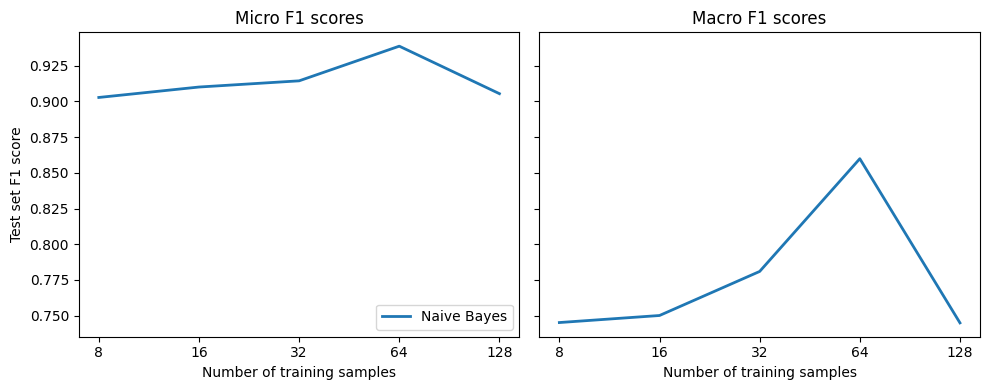

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from collections import defaultdict
import matplotlib.pyplot as plt
from datasets import Dataset, DatasetDict
from skmultilearn.model_selection import iterative_train_test_split

# Carregar seu DataFrame aqui
# df = pd.read_csv('seu_dataset.csv')

# Exemplo: df = pd.DataFrame({"label": [["label1"], ["label2", "label3"], ...], "text": ["texto1", "texto2", ...]})

# Verifique se há valores ausentes na coluna 'text' e trate-os
df['text'].fillna('', inplace=True)  # Preencher valores ausentes com string vazia

# Criar um MultiLabelBinarizer e transformar as labels
mlb = MultiLabelBinarizer()
mlb.fit(df["label"])  # Ajustar nas labels únicas do DataFrame

# Dividir os dados em treinamento e teste
def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = mlb.transform(df["label"])
    ind_train, _, ind_test, _ = iterative_train_test_split(ind, labels, test_size)
    return df.iloc[ind_train[:, 0]], df.iloc[ind_test[:, 0]]

np.random.seed(0)
df_train, df_test = balanced_split(df, test_size=0.5)

# Criar um DatasetDict
ds = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True)),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True))
})

# Preparar labels para o Dataset
def prepare_labels(batch):
    batch["label_ids"] = mlb.transform(batch["label"])
    return batch

# Mapear labels para o Dataset
ds = ds.map(prepare_labels, batched=True)

macro_scores, micro_scores = defaultdict(list), defaultdict(list)
train_samples = [8, 16, 32, 64, 128]  # Tamanhos de amostra desejados
train_slices = [np.random.choice(len(ds["train"]), size=k, replace=False) for k in train_samples]

for train_slice in train_slices:
    # Obter a amostra de treinamento
    ds_train_sample = ds["train"].select(train_slice)
    y_train = np.array(ds_train_sample["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])

    # Usar um CountVectorizer para codificar os textos como contagens de tokens
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_sample["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])

    # Criar e treinar o modelo
    classifier = BinaryRelevance(classifier=MultinomialNB())
    classifier.fit(X_train_counts, y_train)

    # Gerar previsões e avaliar
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(y_test, y_pred_test, target_names=mlb.classes_, zero_division=0, output_dict=True)

    # Armazenar métricas
    macro_scores["Naive Bayes"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes"].append(clf_report["micro avg"]["f1-score"])

# Função para plotar métricas
def plot_metrics(micro_scores, macro_scores, sample_sizes, current_model):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    for run in micro_scores.keys():
        if run == current_model:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linewidth=2)
            ax1.plot(sample_sizes, macro_scores[run], label=run, linewidth=2)
        else:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linestyle="dashed")
            ax1.plot(sample_sizes, macro_scores[run], label=run, linestyle="dashed")

    ax0.set_title("Micro F1 scores")
    ax1.set_title("Macro F1 scores")
    ax0.set_ylabel("Test set F1 score")
    ax0.legend(loc="lower right")
    for ax in [ax0, ax1]:
        ax.set_xlabel("Number of training samples")
        ax.set_xscale("log")
        ax.set_xticks(sample_sizes)
        ax.set_xticklabels(sample_sizes)
        ax.minorticks_off()
    plt.tight_layout()
    plt.show()

# Plotar métricas
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes")

# 12) Utilize o recurso de embeddings, o gpt-2 disponível no Hugging Faces em "miguelvictor/python-gpt2-large" e os recursos oferecidos pelo FAISS para apresentar e discutir os resultados de micro e macro F1 score com o dataset por você selecionado e pré-processado nas etapas anteriores.


In [29]:
from transformers import GPT2Model, GPT2Tokenizer
import faiss
import torch
import numpy as np
from tqdm import tqdm

# Carregando o modelo e o tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("miguelvictor/python-gpt2-large")
model = GPT2Model.from_pretrained("miguelvictor/python-gpt2-large")

# Definindo o token de padding como o token de fim de sequência (eos_token)
tokenizer.pad_token = tokenizer.eos_token

# Lista para armazenar os embeddings
embeddings = []

# Definir o tamanho máximo de sequência (por exemplo, 512 tokens)
max_length = 512

# Pegando os primeiros 400 registros
df_limited = df.head(400)

# Gerando os embeddings com uma barra de progresso
print("Gerando embeddings...")
for text in tqdm(df_limited['text'].tolist(), desc="Processando textos"):
    # Tokenizando o texto com truncamento e padding
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
    with torch.no_grad():
        outputs = model(**inputs)
    # Pegando o embedding médio (média dos vetores do estado escondido para cada token)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    embeddings.append(embedding)

# Transformando a lista de embeddings em um array numpy
embeddings_array = np.array(embeddings)

# Usando FAISS para indexar os embeddings e calcular similaridade
index = faiss.IndexFlatL2(embeddings_array.shape[1])
faiss.normalize_L2(embeddings_array)
index.add(embeddings_array)

# Exibindo alguns exemplos de embeddings gerados
print("\nExemplos de Embeddings gerados:")
for i in range(5):  # Mostrando os primeiros 5 embeddings como exemplo
    print(f"\nTexto {i+1}: {df_limited['text'].iloc[i]}")
    print(f"Embedding {i+1}: {embeddings_array[i]}")


/home/jrosa/.local/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Gerando embeddings...


Processando textos: 100%|██████████| 400/400 [27:40<00:00,  4.15s/it]


Exemplos de Embeddings gerados:

Texto 1: user id enrondlr pw bnawebescapenumber original message from bna highlights sent thursday june escapenumber escapenumber escapenumber escapenumber pm to bna highlights subject june escapenumber bna inc daily labor report daily labor report highlights table of contents june escapenumber escapenumber issn escapenumber escapenumber registered web subscribers can access the full text of these articles by using the url link supplied information about becoming a subscriber or signing up for a free web trial is available at http web bna com or call bna customer relations at escapenumber escapenumber escapenumber escapenumber mon fri escapenumber escapenumber am escapenumber escapenumber pm et highlights d c circuit overturns nlrb decision on workplace conduct policies a california firm's two workplace policies barring abusive and threatening language and restricting solicitation and distribution did not constitute unfair labor practices the district 